Dataset preview:
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    

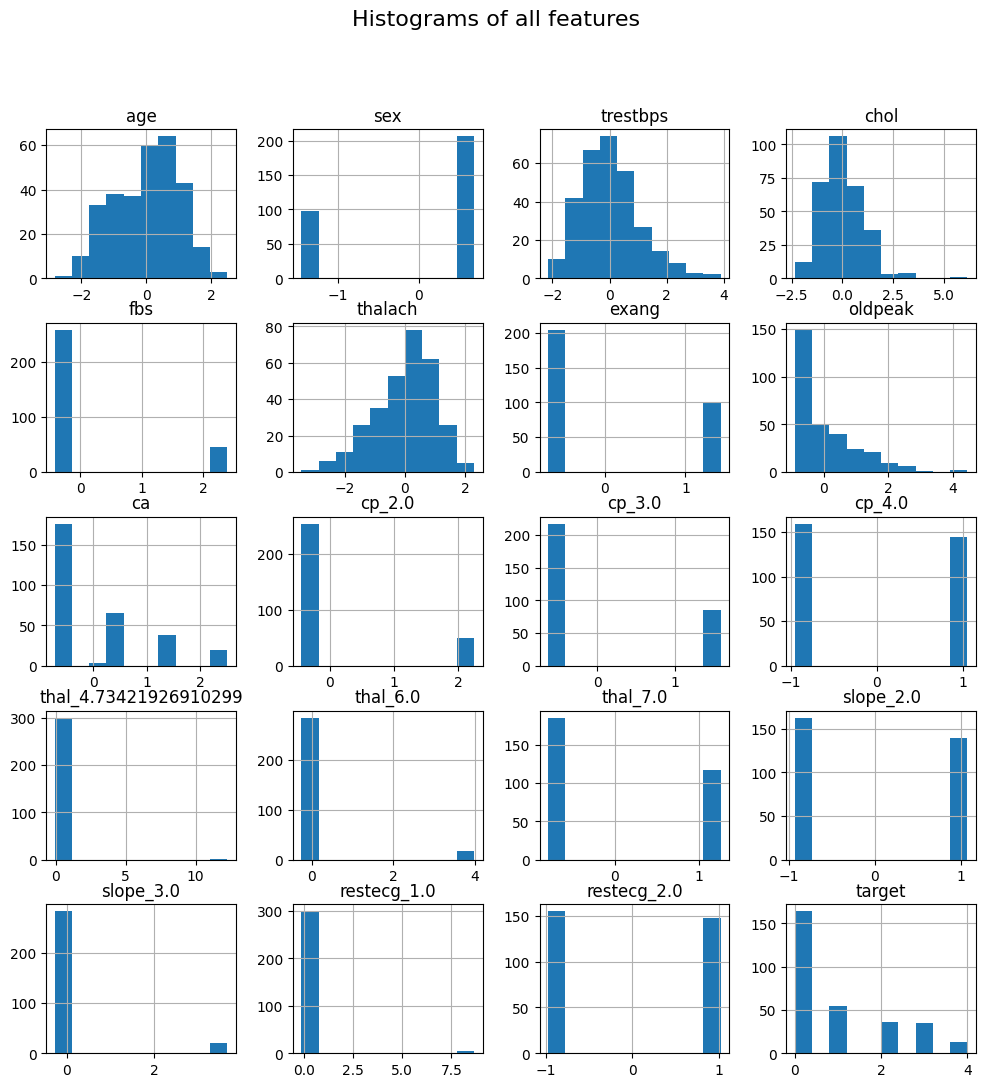

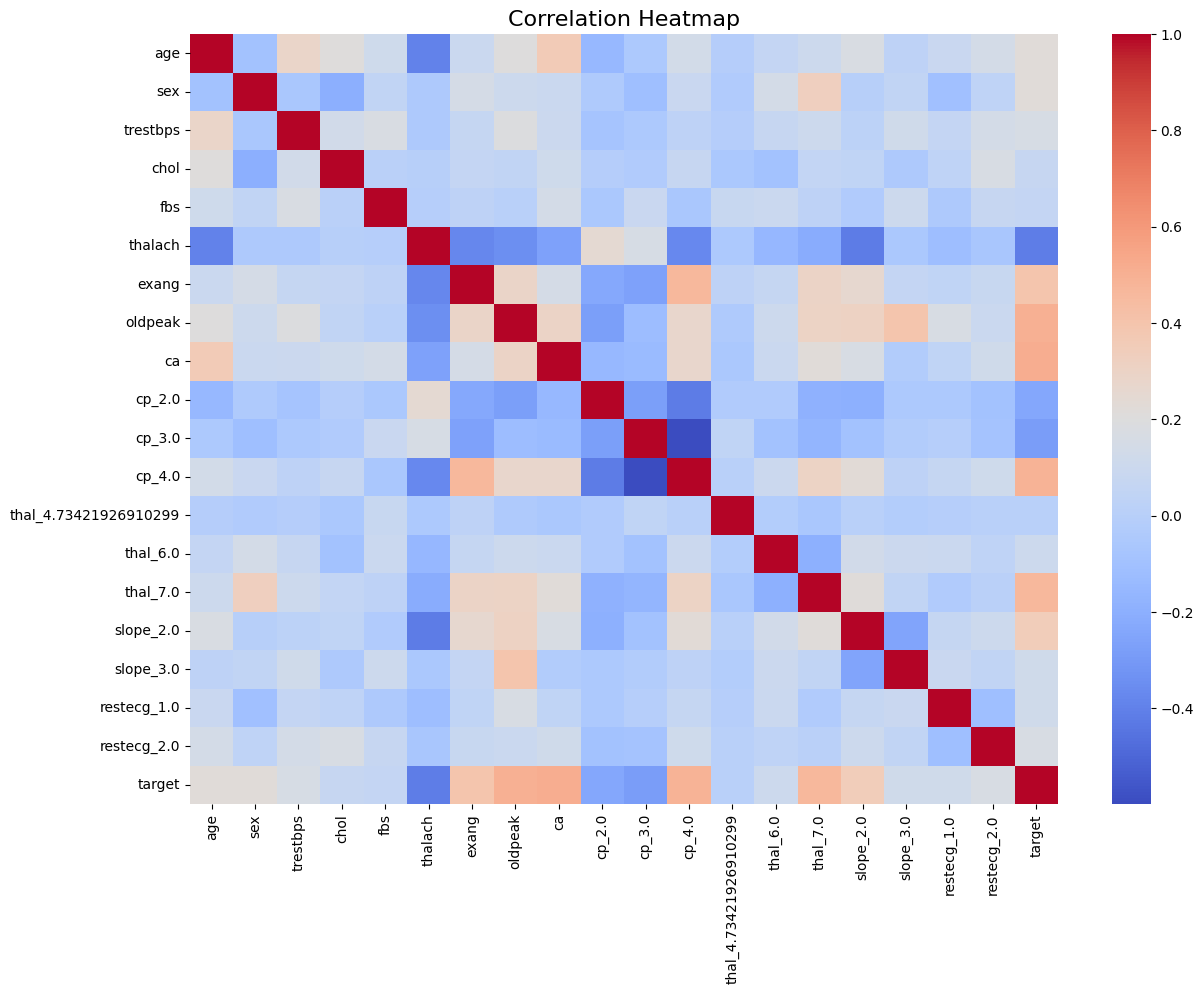

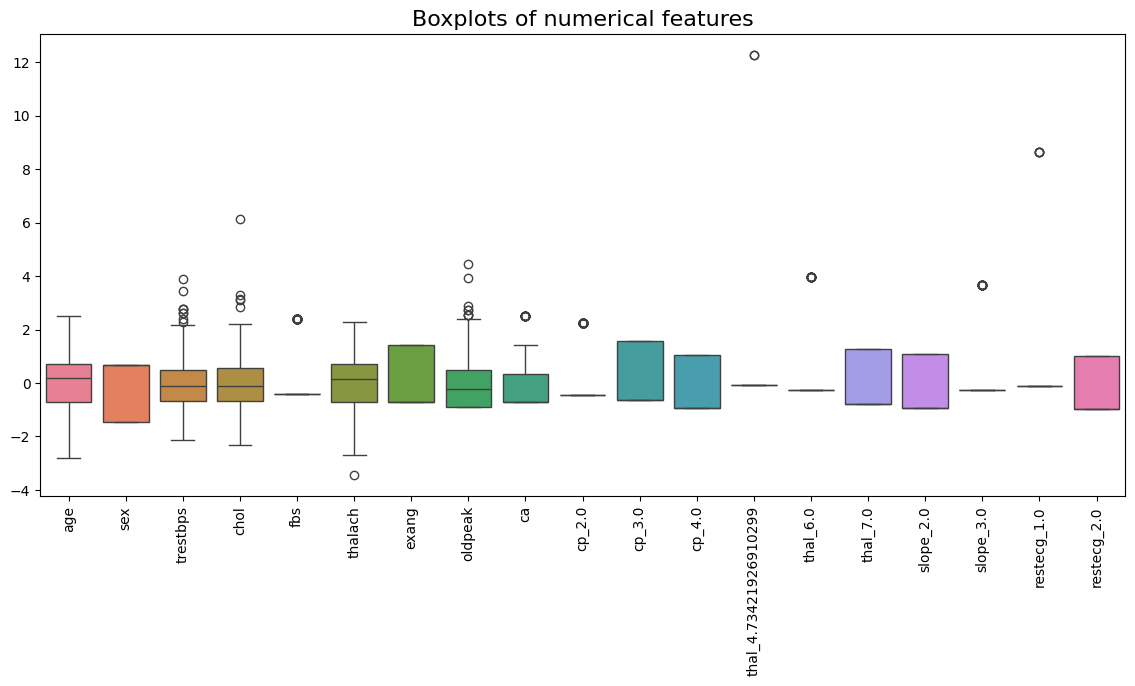

✅ Cleaned dataset saved at: data/cleaned.csv


In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# 2. Define column names (from UCI Heart Disease dataset documentation)
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
    "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"
]

# 3. Load dataset (processed.cleveland.data renamed to heart_disease.csv and placed in data/)
df = pd.read_csv("../data/heart_disease.csv", header=None, names=columns)

print("Dataset preview:")
print(df.head())
print("\nDataset info:")
print(df.info())

# 4. Handle missing values
# Replace "?" with NaN
df = df.replace("?", np.nan)

# Convert all columns to numeric (non-numeric values become NaN)
df = df.apply(pd.to_numeric, errors='coerce')

# Check missing values
print("\nMissing values count:")
print(df.isnull().sum())

# Fill missing values with column mean
df.fillna(df.mean(), inplace=True)

# 5. One-hot encoding for categorical columns
df = pd.get_dummies(df, columns=["cp", "thal", "slope", "restecg"], drop_first=True)

print("\nAfter one-hot encoding:")
print(df.head())

# 6. Feature scaling (excluding target)
features = df.drop("target", axis=1)
target = df["target"]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

df_scaled = pd.DataFrame(scaled_features, columns=features.columns)
df_scaled["target"] = target

print("\nAfter scaling:")
print(df_scaled.head())

# 7. Exploratory Data Analysis (EDA)

# Histograms
df_scaled.hist(figsize=(12,12))
plt.suptitle("Histograms of all features", fontsize=16)
plt.show()

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(df_scaled.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

# Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=df_scaled.drop("target", axis=1))
plt.xticks(rotation=90)
plt.title("Boxplots of numerical features", fontsize=16)
plt.show()

# 8. Save the cleaned dataset
df_scaled.to_csv("../data/cleaned.csv", index=False)
print("✅ Cleaned dataset saved at: data/cleaned.csv")
